## Project 3 Reddit Posts

### Problem Statement

I am a data scientist in Reddit and recently, the operation team discover that there is data corruption resulting in a loss of data for recent subreddit posts for these 2 particular subreddits - Parenting and Relationship Advice and they happen to be subreddits which have many members and active. The operation team managed to recover the some data which are basically the posts and their descriptions but not the subreddits which they belong to i.e. Parenting or Relationship Advice. Hence, they have engaged the data team, in particular myself to help them classify these posts to the respective subreddits for them to restore the data.

For this problem,, my proposed solution will be two-fold:
1. Using [Pushshift's](https://github.com/pushshift/api) API, I will collect posts from the two subreddits - Parenting and Relationship Advice.
2. I will then use NLP to train a classifier on which subreddit a given post came from. This is a binary classification problem.

### Natural Learning Processing (NLP) and Modelling

For this notebook (second part), I constructed several models to classify the subreddit based on the text in the title and selftext of extracted data for training of the model. Subsequently, I chose the best model as my final model to finally classify the subreddits requested by the operation team. The selection of the final model is primarily based on the accuracy score of the different models but also considering specificity, sensitivity scores of the model and ROC curves. Finally,  I updated the model on the entire training dataset and used this model to classify the subreddit. The details of each step will be captured in the following -

#### 1.  Data preparation
> - Read in the combined data which i have extracted from the step 1 notebook which uses the PushshiftAPI to gather the subreddit posts. The code to retrieve subreddit posts and store them as database entries is in the notebook titled Step 1 - API_reading.ipynb.
> - Noted that these 2 terms "Parenting" and "Relationship Advice" might affect the classifer in the form of target leakage. I have decided to use regex to remove the relevant term from the relevant subreddit data i.e. "Parenting" will be removed from Parenting's posts and "Relationship Advice" and "Relationship_Advice" will be removed from the Relationship Advice" posts. I decided to do this because if I didnt do this - These 2 terms is found in about 5% of their respective subreddits' posts which are relatively high and will affect the classifier.
>- Use CountVectorizer and TfidfVectorizer to get the different features which will be used in modelling. Also, I have used barchart to have some visualization of the top occuring words/features for each subreddit considering the 2 different vectorizers

#### 2. Data Processing (Vectorization)
> - I will be using both CountVectorizer and TfidfVectorizer together with the different models such as RandomForest, Logistic Regressions and etc to get the final model by experimenting different combinations and evaluating best on the scores. I will be using several functions to combine the classifier/algorithm with the vectorizer using Pipeline and GridSearch for hyperparameter tuning. This will be explainined in next point - Modelling.

#### 3. Modelling
> - The modelling workflow is constructed to loop through the subreddit posts for each individual combination model - First is the 2 different vectorizers - CountVectorizer and TfidfVectorizer followed by running the following model/algorithm one by one -
>>  1. Ensemble of all the different classifiers except RandomForestClassifier (i.e. VotingClassifier)
>>  2. ExtraTrees Algorithm (ExtraTreesClassifier), 
>>  3. Random Forest Algorithm (RandomForestClassifier)
>>  4. Naive Bayes Algorithm (MultinomialNB)
>>  5. Logistic Regression with Lasso Regularization (LogisticRegression)
>>  6. Decision Tree Algorithm (DecisionTreeClassifier)
>>  7. K-Nearest-Neighbor Algorithm (KNeighborsClassifier)

> - Before any modelling is conducted, I will use train_test_split to split my training data into 2 different dataframes so that I can use the train dataset of the training_data to train the model and using the test dataset of the training_data to validate and evaluate the individual model
> - The core of this workflow involves 3 functions - rf_model(), class_model() and ET_tuning(). The rf_model() and class_model() basically run through the different NLP techniques and then each model using Pipeline and GridSearch objects to vectorize and model the data. 
> - Much hyperparameter tuning with numerous iterations is conducted to get the best score for each combindation model and also to reduce overfitting. 
> - The functions rf_model(), class_model() return a dictionary of model outputs using the best estimator from the grid search. This output is stored in a list along with dictionary values of the other models and that list is converted to Pandas DataFrame for evaluation. The difference between rf_model() and class_model() is that the rf_model() is used for Random Forest Model (which i thought would be the best model and hence decided to create a standalone function for more detailed hyperparameter tuning). 
> -The ET_tuning() function is just to specifically do hyperparameter tuning because ExtraTrees model is selected one of the 2 best performing models.

#### 4. Selection of 3 Models to focus
> - After step 3 is completed, I rank the performance of all the models except RandomForest model according to the accuracy score
> - Similarly, I rank the performance of the Vectorizer with RandomForest model according to the accuracy score
> - From the above, I selected the 3 best models (1 of them to be RandomForest model) to focus on the evaluation and also do further hyperparameter tuning to reduce overfitting where possible. In this step, I only do further hyperparameter tuning on ExtraTrees model because of overfitting
> -  The evaluation of the model primarily based on the accuracy score of the different models but also considering specificity and sensitivity scores of the model, ROC curve and area under the curve. 
> - A roc_compare() function is provided to creates a summary of performance of the models including its Receiver Operating Characteristic (ROC) curve, the area under this curve, its accuracy and its confusion matrix of true and false positive and negative predictions. If two models are passed to the function, it will display the ROCs for both models allowing for performance comparisons.

#### 5. Decision on Final Model to be used and predicting the unseen data
> - Final model will be to use TfidfVectorizer with Naive Bayes Algorithm (MultinomialNB) and a separate model is created.
> - I use TfidfVectorizer to fit and transform the entire training_data and transform only the testing_data
> - Update the model on the entire training_data
> - Make predictions on testing_data using the updated model.
> - Save the predictions into a csv file and saving the final model

### Summary of my findings

#### Analysis of the RandomForest Model with the two different vectorizers
Based on the evaluation of the 2 RandomForest combination models, the combination of using TfidfVectorizer with RandomForestClassifier seems to produce better accuracy, specificity and sensitivity scores as compared to the CountVectorizer with RandomClassifier. However, the differences in the scores between these two are quite little. Hence, I have decided to use TfidfVectorizer with RandomForestClassifier as my best RandomForestClassifer combination model.

#### Analysis of other Models/Algorithms excluding RandomForest Model

In general, the top performining models are ExtraTreesClassifier and MultinomialNB models where the accuracy scores are above 0.95 and also the specificity and sensitivity scores are also considered high as compared to other models. However, it seems like there is overfitting in the ExtraTreesClassifier as the accuracy score of the training and testing datasets are 1.00 and 0.959 respectively. I have decided to use these 2 models together with TfidfVectorizer with RandomForestClassifier as the best 3 models to focus on further hyperparameter tuning. In particular, I will do further hyperparameter tuning on ExtraTreesClassifier to try and get the best score and reduce overfitting where possible making use of the details in the 'best_param' column as the test score suggest overfitting now.  Based on these 3 combination models, they suggest that the combinations with TfidfVectorizer seem to perform better than the CountVectorizer. Hence, for my final model, i will use TfidfVectorizer as my final model vectorizer.

#### Analysis of the Final 3 Best Combination Models

Based on the accuracy scores in the sorted dataframe and ROC curves, the best performing model is MultinomialNB. Other performance metrics such as sensitivity and specificity for the MultinomialNB model also outperformed the revised ExtraTreesClassifier (to reduce overfitting) and RandomForestClassifier models. Hence, I will be using TfidfVectorizer with MultinomialNB as the final combination model to predict the data which require classification. This will be carried out in the final step.

### Conclusion and Recommendation

#### Conclusion
In conclusion, after running through different algorithms/models with either TfidfVectorizer or CountVectorizer, my final model used to help tackle the problem of missing subreddit labels (Parenting or Relationship Advice) encountered by the operation team is TfidfVectorizer with MultinomialNB combination model. The primary performance metric that I used to evaluate the various combination models is accuracy score. However, I also consider other performance metrics such as sensitivity, specificity scores, ROC curve and AUC and generally my final model also perform well in all these metrics. 

Based on the accuracy score of the test data after train_test_split, my final model achieved test accuracy score of about 0.954 which is high. The sensitivity and specificity scores are also in the region of 0.94 to 0.95.


#### Recommendation
Given more time, I will look into using stemming and lemmitizing before using CountVectorizer or TfidfVectorizer to see if I can improve my model results. Also, i will look to fine tune the stop words or removing some words which doesnt really make sense such as 'didn', 've' which actually refer to 'didn't' and 'have' respectively.  Also, I can look into tuning the parameters of the vectorizers to get the better features. 

Also, I can look to improve the regex code to remove words which include the subreddits terms - Parenting, Relationship Advice with the possibility of typo errors. Example, i will remove 'ParentingA@' as a whole term.

With this, I expect the model to perform better in classifying the posts, descriptions into the 2 subreddits.


### References - 
- https://stackoverflow.com/questions/37554606/matplotlib-table-row-label-font-color-and-size
- https://stackoverflow.com/questions/9932072/matplotlib-table-formatting
- https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

### Import Libraries

In [1]:
#imports
import pandas as pd
import numpy as np
import re


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier, RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump, load

%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Define functions

In [2]:
# creating a function to run through the different vectorizer with randomforestclassifier algorithm
def rf_model(df, vectorizer, model, random_state):

    # Assign X and y variables
    X = df['final']
    y = df['subreddit']
    
    # Train test split the training data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = random_state) 
    
    # Set up the Pipeline
    if vectorizer == 'cvec' and model == 'rf':
        pipe = Pipeline([('vec', CountVectorizer()),
                         ('rf', RandomForestClassifier())
                        ])
    elif vectorizer == 'tfidf' and model == 'rf':
        pipe = Pipeline([('vec', TfidfVectorizer()),
                         ('rf', RandomForestClassifier())
                        ])
        
    # Amended the best params after conducting few rounds of hyperparameters tuning such as vectorizer max features, max_depth which takes up alot of time. 
    pipe_params = {'vec__max_features': np.arange(1750, 2251, 250).tolist(),
                    'vec__min_df': [0.0],
                    'vec__max_df': [1.0],
                    'vec__ngram_range': [(1,2)],
                    'vec__stop_words': ['english'],
                    'rf__n_estimators': [200],
                    'rf__max_depth': [2,3], #4 and5 is done but results show overfitting
                    'rf__n_jobs': [-1],
                    'rf__random_state': [random_state]
                    }

    mod_out = {}
    gs = GridSearchCV(estimator = pipe, param_grid = pipe_params, cv = 5)
    # fit the model
    gs.fit(X_train, y_train)
    
    #saving confusion matrix values
    
    tn, fp, fn, tp = confusion_matrix(y_test, gs.predict(X_test)).ravel()
    
    # return model parameters
    mod_out['model'] = f" Vectorizer: {vectorizer} and Model: {model}"
    mod_out['size_of_data'] = f"X_train and y_train: {len(X_train)}, X_test and y_test: {len(X_test)}"
    mod_out['train_score'] = gs.score(X_train, y_train)
    mod_out['test_score'] = gs.score(X_test, y_test)
    mod_out['conf_matrix'] = confusion_matrix(y_test, gs.predict(X_test))
    mod_out['specificity'] = tn / (tn + fp)
    mod_out['sensitivity'] = tp / (tp + fn)
    mod_out['pred'] = gs.predict(X_test)
    mod_out['proba'] = gs.predict_proba(X_test)
    mod_out['best_param'] = gs.best_params_
    mod_out['vocabulary'] = gs.best_estimator_.named_steps['vec'].vocabulary_
    mod_out['features'] = gs.best_estimator_.named_steps['vec'].get_feature_names()
    mod_out['vector_matrix'] = gs.best_estimator_.named_steps['vec'].transform(X)
    mod_out['roc_vec'] = roc_curve(y_test, gs.predict_proba(X_test)[:,1], pos_label=1)   
    fpr, tpr, threshold = roc_curve(y_test, gs.predict_proba(X_test)[:,1], pos_label=1)
    mod_out['roc_auc'] = auc(fpr, tpr)  
    
    return mod_out

# creating a function to run through the different vectorizer with different algorithms except RandomForest
def class_model(df, vectorizer, model, random_state):
       
    # Assign X and y variables
    X = df['final']
    y = df['subreddit']
    
    # Train test split the training data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = random_state) 
    
    # Set up the Pipeline
    if vectorizer == 'cvec' and model == 'logr':
        pipe = Pipeline([('vec', CountVectorizer()),
                         ('mod', LogisticRegression(penalty="l1", solver="saga", n_jobs =-1, random_state = random_state))
                        ])
    elif vectorizer == 'tfidf' and model == 'logr':
        pipe = Pipeline([('vec', TfidfVectorizer()),
                         ('mod', LogisticRegression(penalty="l1", solver="saga", n_jobs =-1, random_state = random_state))
                        ])
    elif vectorizer == 'cvec' and model == 'bayem': 
        pipe = Pipeline([('vec', CountVectorizer()),
                         ('mod', MultinomialNB())
                        ])
    elif vectorizer == 'tfidf' and model == 'bayem':
        pipe = Pipeline([('vec', TfidfVectorizer()),
                         ('mod', MultinomialNB())
                        ])
    elif vectorizer == 'cvec' and model == 'knn': 
        pipe = Pipeline([('vec', CountVectorizer()),
                         ('mod', KNeighborsClassifier(n_jobs=-1))
                        ])
    elif vectorizer == 'tfidf' and model == 'knn':
        pipe = Pipeline([('vec', TfidfVectorizer()),
                         ('mod', KNeighborsClassifier(n_jobs=-1))
                        ])
    elif vectorizer == 'cvec' and model == 'ET': 
        pipe = Pipeline([('vec', CountVectorizer()),
                         ('mod', ExtraTreesClassifier(n_jobs=-1, random_state = random_state))
                        ])
    elif vectorizer == 'tfidf' and model == 'ET':
        pipe = Pipeline([('vec', TfidfVectorizer()),
                         ('mod', ExtraTreesClassifier(n_jobs=-1, random_state = random_state))
                        ])
    elif vectorizer == 'cvec' and model == 'DT': 
        pipe = Pipeline([('vec', CountVectorizer()),
                         ('mod', DecisionTreeClassifier(random_state = random_state))
                        ])
    elif vectorizer == 'tfidf' and model == 'DT':
        pipe = Pipeline([('vec', TfidfVectorizer()),
                         ('mod', DecisionTreeClassifier(random_state = random_state))
                        ])
    elif vectorizer == 'cvec' and model == 'vote': 
        pipe = Pipeline([('vec', CountVectorizer()),
                         ('mod', VotingClassifier(estimators = [('logr',LogisticRegression(penalty="l1", solver="saga", 
                                                                                           random_state = random_state)),
                                                                ('bayem', MultinomialNB()), 
                                                                ('knn', KNeighborsClassifier(n_jobs=-1)),
                                                                ('ET', ExtraTreesClassifier(n_jobs=-1,
                                                                                            random_state = random_state)),
                                                                ('DT', DecisionTreeClassifier(random_state = random_state))], 
                                                  voting ='soft'))
                        ])
    elif vectorizer == 'tfidf' and model == 'vote':
        pipe = Pipeline([('vec', TfidfVectorizer()),
                         ('mod', VotingClassifier(estimators = [('logr',LogisticRegression(penalty="l1", solver="saga",
                                                                                          random_state = random_state)),
                                                                ('bayem', MultinomialNB()), 
                                                                ('knn', KNeighborsClassifier(n_jobs=-1)),
                                                                ('ET', ExtraTreesClassifier(n_jobs=-1,
                                                                                            random_state = random_state)),
                                                                ('DT', DecisionTreeClassifier(random_state = random_state))], 
                                                  voting ='soft'))
                        ])
    #Reduce the parameters for tuning after few rounds of iterations to reduce the time to run the pynb.
    pipe_params = {'vec__max_features': np.arange(1000, 2251, 250).tolist(),
                    'vec__min_df': [0.0],
                    'vec__max_df': [1.0],
                    'vec__ngram_range': [(1,2)],
                    'vec__stop_words': ['english']
                   
                    } 
    # append additional parameters for tuning for different model Similarly to the above, I have reduce the size 
    # of hyperparameter tuning after few rounds of iterations which take too much time.
    if model == 'logr':
        pipe_params['mod__C'] = [0.1, 1.0]
    elif model == 'knn':
        pipe_params['mod__n_neighbors'] = np.arange(1,5).tolist()
    
    
    # Set up the grid search
    mod_out = {}
    gs = GridSearchCV(estimator = pipe, param_grid = pipe_params, cv = 5)
    # fit the model
    gs.fit(X_train, y_train)
    
    #saving confusion matrix values
    
    tn, fp, fn, tp = confusion_matrix(y_test, gs.predict(X_test)).ravel()
    
    # return model parameters
    mod_out['model'] = f" Vectorizer: {vectorizer} and Model: {model}"
    mod_out['size_of_data'] = f"X_train and y_train: {len(X_train)}, X_test and y_test: {len(X_test)}"
    mod_out['train_score'] = gs.score(X_train, y_train)
    mod_out['test_score'] = gs.score(X_test, y_test)
    mod_out['conf_matrix'] = confusion_matrix(y_test, gs.predict(X_test))
    mod_out['specificity'] = tn / (tn + fp)
    mod_out['sensitivity'] = tp / (tp + fn)
    mod_out['pred'] = gs.predict(X_test)
    mod_out['proba'] = gs.predict_proba(X_test)
    mod_out['best_param'] = gs.best_params_
    mod_out['vocabulary'] = gs.best_estimator_.named_steps['vec'].vocabulary_
    mod_out['features'] = gs.best_estimator_.named_steps['vec'].get_feature_names()
    mod_out['vector_matrix'] = gs.best_estimator_.named_steps['vec'].transform(X)
    mod_out['roc_vec'] = roc_curve(y_test, gs.predict_proba(X_test)[:,1], pos_label=1)   
    fpr, tpr, threshold = roc_curve(y_test, gs.predict_proba(X_test)[:,1], pos_label=1)
    mod_out['roc_auc'] = auc(fpr, tpr)
       
    return mod_out

# create a function to do further hyperparameter tuning for ExtraTreesClassifer - same concept as above 2 functions
def ET_tuning(df, random_state):
       
    # Assign X and y variables
    X = df['final']
    y = df['subreddit']
    
    # Train test split the training data
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = random_state) 
    
    # Set up the Pipeline
    pipe = Pipeline([('vec', TfidfVectorizer()),
                ('rf', ExtraTreesClassifier())])
    # Setting up the pipe params - make a few refinements after several iterations of hyperparameter tuning already
    pipe_params = {'vec__max_features': [1000], #800,900, 1100, 1200 done
                'vec__min_df': [0.0],
                'vec__max_df': [1.0],
                'vec__ngram_range': [(1,2)],
                'vec__stop_words': ['english'],
                'rf__n_estimators': [150,175], #n_estimators of 100,125,200 done
                'rf__max_depth': [4], #max_depth of 1 to 5 is done
                'rf__n_jobs': [-1],
                'rf__random_state': [random_state]
              }
    # Set up the grid search
    mod_out = {}
    gs = GridSearchCV(estimator = pipe, param_grid = pipe_params, cv = 5)
    # fit the model
    gs.fit(X_train, y_train)
    
    #saving confusion matrix values
    
    tn, fp, fn, tp = confusion_matrix(y_test, gs.predict(X_test)).ravel()
    
    # return model parameters
    mod_out['model'] = f" Revised Model - Vectorizer: tfidf and Model: ET"
    mod_out['size_of_data'] = f"X_train and y_train: {len(X_train)}, X_test and y_test: {len(X_test)}"
    mod_out['train_score'] = gs.score(X_train, y_train)
    mod_out['test_score'] = gs.score(X_test, y_test)
    mod_out['conf_matrix'] = confusion_matrix(y_test, gs.predict(X_test))
    mod_out['specificity'] = tn / (tn + fp)
    mod_out['sensitivity'] = tp / (tp + fn)
    mod_out['pred'] = gs.predict(X_test)
    mod_out['proba'] = gs.predict_proba(X_test)
    mod_out['best_param'] = gs.best_params_
    mod_out['vocabulary'] = gs.best_estimator_.named_steps['vec'].vocabulary_
    mod_out['features'] = gs.best_estimator_.named_steps['vec'].get_feature_names()
    mod_out['vector_matrix'] = gs.best_estimator_.named_steps['vec'].transform(X)
    mod_out['roc_vec'] = roc_curve(y_test, gs.predict_proba(X_test)[:,1], pos_label=1)   
    fpr, tpr, threshold = roc_curve(y_test, gs.predict_proba(X_test)[:,1], pos_label=1)
    mod_out['roc_auc'] = auc(fpr, tpr)
    
    return mod_out

# create a function to plot ROC curve, display model statistics depending on how many ROC curve to plot
def roc_compare(m_df, mlocs = []):
    
    # Create a plot showing the 
    fig, ax = plt.subplots(figsize = (20,15))  

    # Set up parameters of the plot
    ax.set_title('Receiver Operating Characteristic (ROC)', fontsize = 40)
    ax.set_xlabel('False positive rate', fontsize = 30)
    ax.set_ylabel('True positive rate', fontsize = 30)
    ax.tick_params(axis="x", labelsize=25)
    ax.tick_params(axis='y', labelsize=25)    
    
    # set up false positive and false negative lists
    fpr = []
    tpr = []
    roc_auc = []
    for mloc in mlocs:
        fpr.append(m_df.loc[mloc, 'roc_vec'][0])
        tpr.append(m_df.loc[mloc, 'roc_vec'][1])
        roc_auc.append(round(m_df.loc[mloc, 'roc_auc'],4))
    
    # if only 1 model to plot
    if len(mlocs) == 1:
        # Plot these values and the ROC minimum 
        ax = plt.plot(fpr[0], tpr[0], linewidth = 3)
        ax = plt.plot(fpr[0], fpr[0], c = "grey", alpha = .3, linewidth = 3, linestyle='--') 

        # Annotate with text + Arrow
        p_tit = m_df.loc[mloc, 'model']
        x1 = fpr[0][int(len(fpr[0])/2)]
        y1 = tpr[0][int(len(tpr[0])/2)]
        if y1 > .5:
            x1_t = x1 + .10
            y1_t = y1 - .10
        else:
            x1_t = x1 + .10
            y1_t = y1 + .20
        plt.annotate(p_tit, xy=(x1, y1), xytext=(x1_t, y1_t), color = 'grey',
            arrowprops=dict(facecolor='grey', shrink=0.1), fontsize = 25)
        
        # Add AUC text
        plt.text(.1, .9, "AUC: %.4f" % roc_auc[0], horizontalalignment='left', 
            fontsize = 30,color='grey', weight='bold')
        # Add titles and performance metrics
        plt.text(.81, .45, "Confusion matrix", 
            horizontalalignment='center', fontsize = 22,color='grey', weight='semibold') 
        plt.text(.81, .425, "Model- " + m_df.loc[mlocs[0], 'model'], 
            horizontalalignment='center', fontsize = 15,color='grey', weight='semibold')            
        plt.text(.81, .4, "Test accuracy- " + str(round(m_df.loc[mlocs[0],'test_score'], 4)), 
            horizontalalignment='center', fontsize = 15,color='grey', weight='semibold')
        plt.text(.81, .375, "Test specificity- " + str(round(m_df.loc[mlocs[0],'specificity'], 4)), 
            horizontalalignment='center', fontsize = 15,color='grey', weight='semibold')
        plt.text(.81, .35, "Test sensitivity- " + str(round(m_df.loc[mlocs[0],'sensitivity'], 4)), 
            horizontalalignment='center', fontsize = 15,color='grey', weight='semibold')
        
        # Create a table with the confusion matrix
        col_labels=['Predicted\n' + 'Relationship Advice', 
                    'Predicted\n' + 'Parenting']
        row_labels=['Actual\n' + 'Relationship Advice', 
                    'Actual\n' + 'Parenting']
        ax = plt.table(cellText=m_df.loc[mlocs[0],'conf_matrix'], rowLabels=row_labels,
                       colLabels=col_labels, cellLoc = 'right', rowLoc = 'center', loc='right', 
                       bbox=[.65,.05,.3,.3])
        ax.auto_set_font_size(False)  
        
        # see https://stackoverflow.com/questions/37554606/matplotlib-table-row-label-font-color-and-size
        table_props = ax.properties()
        table_cells = table_props['children']
        for cell in table_cells: 
            cell._text.set_fontsize(15)
            cell._text.set_color('grey')

    
    # Add a second or third graph if len mlocs > 1
    if len(mlocs) > 1:
        
        # Add titles and performance metrics          
        plt.text(.7, .4, "Model Comparison", 
                horizontalalignment='center', fontsize = 25,color='grey', weight='semibold')       

        # plot the baseline
        ax = plt.plot(fpr[0],fpr[0], c = "grey", alpha = .3, linewidth = 3, linestyle='--')
 
        # Plot these values
        for i in range(len(mlocs)):
        #for i in mlocs:
            # plot the ROC curves
            ax = plt.plot(fpr[i], tpr[i], linewidth = 3)

            # Annotate with text + Arrow
            p_tit = "Model " + str(i + 1) + "- " + m_df.loc[mlocs[i], 'model']
            x1 = fpr[i][int(len(fpr[i])/2)]
            y1 = tpr[i][int(len(tpr[i])/2)]
            if y1 > .5:
                x1_t = x1 + .08
                y1_t = y1 - .12 * i
            else:
                x1_t = x1 + .10
                y1_t = y1 + .15 * i

            plt.annotate(p_tit, xy=(x1, y1), xytext=(x1_t, y1_t), color = 'grey',
                arrowprops=dict(facecolor='grey', shrink=0.1), fontsize = 25)

        # Print model characteristics
        col_labels=['Accuracy', 'AUC']
        row_labels=["Model " + str(i + 1) + "- " + m_df.loc[mlocs[i], 'model']for i in range(len(mlocs))]
        cell_text = [[round(m_df.loc[mlocs[i], 'test_score'],4), round(m_df.loc[mlocs[i], 'roc_auc'],4)] \
                      for i in range(len(mlocs))]        
        ax = plt.table(cellText=cell_text, rowLabels=row_labels,
                       colLabels=col_labels, cellLoc = 'right', rowLoc = 'center', loc='right', 
                       bbox=[.79,.05,.2,.3])
        ax.auto_set_font_size(False)          
        # see https://stackoverflow.com/questions/37554606/matplotlib-table-row-label-font-color-and-size
        table_props = ax.properties()
        table_cells = table_props['children']
        for cell in table_cells: 
            cell._text.set_fontsize(20)
            cell._text.set_color('grey')



### Exploring Data and Processing of Data

In [3]:
# Reading the data which I have done in Step 1
df = pd.read_csv("Combined Data.csv")

In [4]:
# Using info function to check the dataframe for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3264 non-null   object
 1   selftext   3261 non-null   object
 2   title      3264 non-null   object
dtypes: object(3)
memory usage: 76.6+ KB


In [5]:
# Drop null values as there are only a total of 3 rows with null values
df.dropna(inplace=True)

In [6]:
# Checking for imbalance data - Almost 50 -50
df.subreddit.value_counts()

relationship_advice    1683
Parenting              1578
Name: subreddit, dtype: int64

In [7]:
# Create a 'combined' column to consolidate both selftext and title cells into 1 cell
df['combined'] = df['title'] + ' ' + df['selftext']

In [8]:
df.head()

,subreddit,selftext,title,combined
0,Parenting,So I live with a 3 year old who constantly hit...,Is it normal for a 3 year old to hit constantly,Is it normal for a 3 year old to hit constantl...
1,Parenting,"My son just turned 7, and at times he seems li...",Normal common sense in a child...,Normal common sense in a child... My son just ...
2,Parenting,My son is 6 months old and I'm fully aware thi...,Getting bruised by a baby,Getting bruised by a baby My son is 6 months o...
3,Parenting,My 8 year old is terrible to get out of the be...,Morning routine,Morning routine My 8 year old is terrible to g...
4,Parenting,TW: PPD\n\nMy 17 month old is a tornado and th...,My house is trashed...,My house is trashed... TW: PPD\n\nMy 17 month ...


In [9]:
# dropping columns selftext and title
df.drop(columns=['selftext', 'title'], inplace=True)
df

,subreddit,combined
0,Parenting,Is it normal for a 3 year old to hit constantl...
1,Parenting,Normal common sense in a child... My son just ...
2,Parenting,Getting bruised by a baby My son is 6 months o...
3,Parenting,Morning routine My 8 year old is terrible to g...
4,Parenting,My house is trashed... TW: PPD\n\nMy 17 month ...
...,...,...
3259,relationship_advice,What do i mean to him? i’ve been talking to th...
3260,relationship_advice,"What do I do now that I know I like them? I, a..."
3261,relationship_advice,It feels like my partner likes making me jealo...
3262,relationship_advice,Boyfriend(24M) of 3 years keeps checking out o...


#### Using of Regex to remove subreddit from cell

In [10]:
# Creating a dataframe for only subreddit Parenting
df_p = df.loc[df['subreddit'] == 'Parenting']
df_p

,subreddit,combined
0,Parenting,Is it normal for a 3 year old to hit constantl...
1,Parenting,Normal common sense in a child... My son just ...
2,Parenting,Getting bruised by a baby My son is 6 months o...
3,Parenting,Morning routine My 8 year old is terrible to g...
4,Parenting,My house is trashed... TW: PPD\n\nMy 17 month ...
...,...,...
1575,Parenting,Toddler refuses to eat at daycare So the title...
1576,Parenting,How do you balance school &amp; extracurricula...
1577,Parenting,Thoughts an experience with putting your child...
1578,Parenting,Help finding a toy - yellow fire truck with a ...


In [11]:
# Using regex to remove the subreddit term parenting from the combined cell (target leakage)
df_p['final']= df_p.combined.map(lambda x: re.sub(r"([Pp][Aa][Rr][Ee][Nn][Tt][Ii][Nn][Gg])",'',x))

In [12]:
# Instantiate CountVectorizer, fit and transform the dataframe
cvec = CountVectorizer(stop_words='english')
cvec_p = pd.DataFrame(cvec.fit_transform(df_p['final']).todense(),
                          columns = cvec.get_feature_names())

In [13]:
# Checking if parenting is fully removed i.e. done properly
parenting_cols = [col for col in cvec_p.columns if 'parenting' in col]
print(parenting_cols)

[]


In [14]:
# Creating a dataframe for only subreddit relationship advice
df_ra = df.loc[df['subreddit'] == 'relationship_advice']
df_ra

,subreddit,combined
1580,relationship_advice,How much is it normal or acceptable for couple...
1581,relationship_advice,I want to break something. \nI really just wan...
1582,relationship_advice,I need some advice I need some advices in how ...
1583,relationship_advice,Physical affection This is kind of long but I’...
1584,relationship_advice,My [21M] ex gf [20F] wants to hang out with my...
...,...,...
3259,relationship_advice,What do i mean to him? i’ve been talking to th...
3260,relationship_advice,"What do I do now that I know I like them? I, a..."
3261,relationship_advice,It feels like my partner likes making me jealo...
3262,relationship_advice,Boyfriend(24M) of 3 years keeps checking out o...


In [15]:
# Using regex to remove the subreddit term relationship advice from the combined cell (target leakage)
# Included relationship_advice because in the earlier iteration of Countvectorizer I discovered a few rows with "relationship_advice"
df_ra['final']= df_ra.combined.map(lambda x: re.sub(r"([Rr][Ee][Ll][Aa][Tt][Ii][Oo][Nn][Ss][Hh][Ii][Pp][ _][Aa][Dd][Vv][Ii][Cc][Ee])",'',x))
df_ra

,subreddit,combined,final
1580,relationship_advice,How much is it normal or acceptable for couple...,How much is it normal or acceptable for couple...
1581,relationship_advice,I want to break something. \nI really just wan...,I want to break something. \nI really just wan...
1582,relationship_advice,I need some advice I need some advices in how ...,I need some advice I need some advices in how ...
1583,relationship_advice,Physical affection This is kind of long but I’...,Physical affection This is kind of long but I’...
1584,relationship_advice,My [21M] ex gf [20F] wants to hang out with my...,My [21M] ex gf [20F] wants to hang out with my...
...,...,...,...
3259,relationship_advice,What do i mean to him? i’ve been talking to th...,What do i mean to him? i’ve been talking to th...
3260,relationship_advice,"What do I do now that I know I like them? I, a...","What do I do now that I know I like them? I, a..."
3261,relationship_advice,It feels like my partner likes making me jealo...,It feels like my partner likes making me jealo...
3262,relationship_advice,Boyfriend(24M) of 3 years keeps checking out o...,Boyfriend(24M) of 3 years keeps checking out o...


In [16]:
# Fit and transform the dataframe
cvec_ra = pd.DataFrame(cvec.fit_transform(df_ra['final']).todense(),
                          columns = cvec.get_feature_names())

In [17]:
# checking if the subreddit term relationship advice is properly removed
rship_cols = [col for col in cvec_ra.columns if 'relationship' in col]
#print(list(df_cvec.columns))
print(rship_cols)

['everyone_says_i_am_in_an_abusive_relationship_but', 'relationship', 'relationships', 'relationshipy']


#### Identification of Top Occuring Words in Individual Subreddit

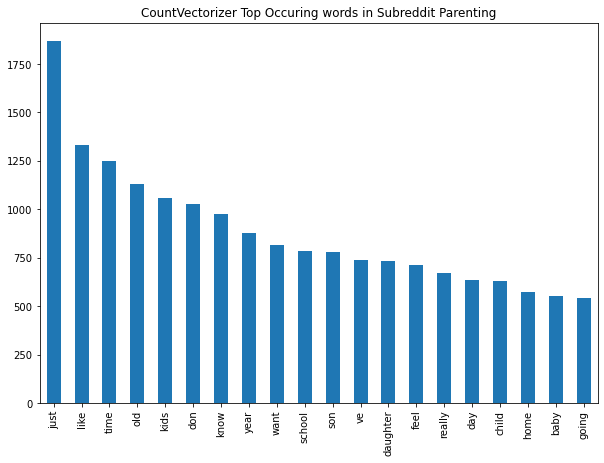

In [18]:
# plot top occuring words
cvec_p.sum().sort_values(ascending=False).head(20).plot(kind='bar', figsize = (10,7))
plt.title('CountVectorizer Top Occuring words in Subreddit Parenting');

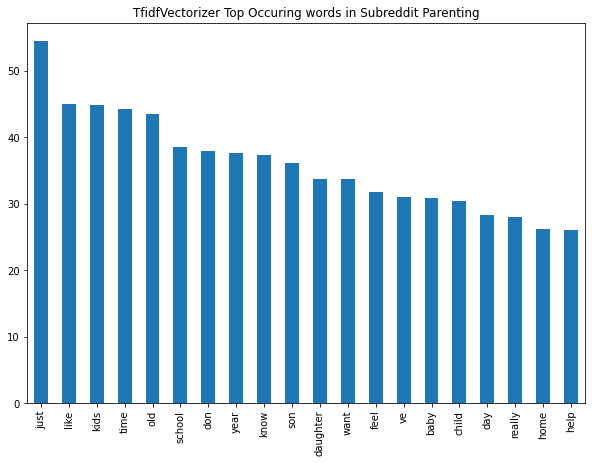

In [19]:
# Instantiate TfidfVectorizer, fit and transform the dataframe
tfidf = TfidfVectorizer(stop_words='english')
tvec_ra = pd.DataFrame(tfidf.fit_transform(df_p['final']).todense(), columns = tfidf.get_feature_names())

# plot top occuring words
tvec_ra.sum().sort_values(ascending=False).head(20).plot(kind='bar', figsize = (10,7))
plt.title('TfidfVectorizer Top Occuring words in Subreddit Parenting');

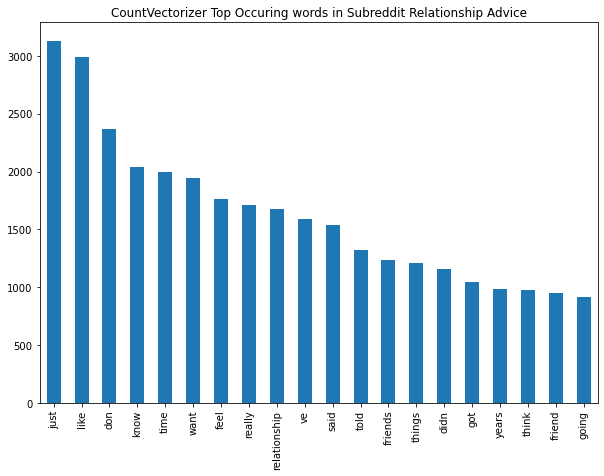

In [20]:
# plot top occuring words
cvec_ra.sum().sort_values(ascending=False).head(20).plot(kind='bar', figsize = (10,7))
plt.title('CountVectorizer Top Occuring words in Subreddit Relationship Advice');

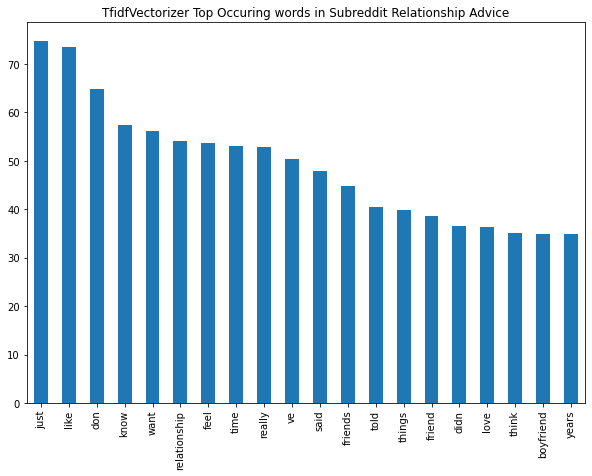

In [21]:
# Instantiate TfidfVectorizer, fit and transform the dataframe
tfidf = TfidfVectorizer(stop_words='english')
tvec_ra = pd.DataFrame(tfidf.fit_transform(df_ra['final']).todense(), columns = tfidf.get_feature_names())

# plot top occuring words
tvec_ra.sum().sort_values(ascending=False).head(20).plot(kind='bar', figsize = (10,7))
plt.title('TfidfVectorizer Top Occuring words in Subreddit Relationship Advice');

Despite doing lemmatizing and stemming using WordNetLemmatizer from nltk library, the words "don", "ve" still occur. Hence, I decided to proceed without lemmatizing and stemming for now for this project.

In [22]:
# Concatenating both subreddits dataframe after processing with regex
df_final = pd.concat([df_p, df_ra], ignore_index =True)

In [23]:
# dropping the combined column
df_final.drop(columns=['combined'], inplace=True)

In [24]:
# mapping subreddit parenting to 1 and relationship advice to 0 for modelling.
df_final['subreddit'] = df_final['subreddit'].map({"Parenting": 1, "relationship_advice": 0})

In [25]:
df_final

,subreddit,final
0,1,Is it normal for a 3 year old to hit constantl...
1,1,Normal common sense in a child... My son just ...
2,1,Getting bruised by a baby My son is 6 months o...
3,1,Morning routine My 8 year old is terrible to g...
4,1,My house is trashed... TW: PPD\n\nMy 17 month ...
...,...,...
3256,0,What do i mean to him? i’ve been talking to th...
3257,0,"What do I do now that I know I like them? I, a..."
3258,0,It feels like my partner likes making me jealo...
3259,0,Boyfriend(24M) of 3 years keeps checking out o...


In [26]:
# using train_test_split to split the data where the testing_data will be considered as final unseen posts to be classified
training_data, testing_data = train_test_split(df_final, test_size=0.2, random_state=42, stratify = df['subreddit'])
# checking the size of the data after train_test_split
print("Training Dataset: " + str(training_data.shape[0]))
print("Testing Dataset: " + str(testing_data.shape[0]))

Training Dataset: 2608
Testing Dataset: 653


In [27]:
# Check for any imbalance in training dataset
print(training_data.subreddit.value_counts())
print(1262/(1262+1346))

0    1346
1    1262
Name: subreddit, dtype: int64
0.4838957055214724


In [28]:
# using head function to check for first 5 rows of training dataset
training_data.head()

,subreddit,final
2335,0,Boyfriend is still hung up on ex (possibly?) Y...
1623,0,I am in love with my best friend's ex.(throwaw...
2755,0,Brother-In-Law living with my wife and I... My...
2132,0,Is it my responsibility to keep grandparents i...
2502,0,"Has anyone successfully broke a Trauma Bond, i..."


### Modelling

#### RandomForest Model

In [29]:
# creating model parameters to be modelled
model_params_rf = [('cvec','rf'), ('tfidf','rf')]

# creating a list to store the model output from the rf_model function and a for loop to run through the different vectorizers with randomforest models.
rf_list = []
for model_p in model_params_rf:
    rf_mod = rf_model(training_data, vectorizer = model_p[0], 
                     model = model_p[1], random_state = 42)
    # append this model output to the list
    rf_list.append(rf_mod)


In [30]:
# storing the rf_list into a dataframe
rf_df = pd.DataFrame(rf_list)

# sorting the dataframe by test score (accuracy)
rf_df.sort_values(by = 'test_score', ascending =False)

,model,size_of_data,train_score,test_score,conf_matrix,specificity,sensitivity,pred,proba,best_param,vocabulary,features,vector_matrix,roc_vec,roc_auc
1,Vectorizer: tfidf and Model: rf,"X_train and y_train: 1956, X_test and y_test: 652",0.931493,0.927914,"[[314, 23], [24, 291]]",0.931751,0.92381,"[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, ...","[[0.4735498701868416, 0.5264501298131584], [0....","{'rf__max_depth': 3, 'rf__n_estimators': 200, ...","{'does': 434, 'physically': 1143, 'hurt': 761,...","[10, 100, 11, 12, 13, 14, 15, 16, 17, 18, 18f,...","(0, 1742)\t0.07443981532262661\n (0, 1732)\...","([0.0, 0.0, 0.0, 0.002967359050445104, 0.00296...",0.973360
0,Vectorizer: cvec and Model: rf,"X_train and y_train: 1956, X_test and y_test: 652",0.927914,0.918712,"[[310, 27], [26, 289]]",0.919881,0.91746,"[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, ...","[[0.48098862692069483, 0.5190113730793049], [0...","{'rf__max_depth': 3, 'rf__n_estimators': 200, ...","{'does': 434, 'physically': 1143, 'hurt': 761,...","[10, 100, 11, 12, 13, 14, 15, 16, 17, 18, 18f,...","(0, 37)\t1\n (0, 46)\t1\n (0, 111)\t1\n (...","([0.0, 0.0, 0.0, 0.002967359050445104, 0.00296...",0.972583


In [31]:
# checking on the best param for tfidf vectorizer and randomforest model which provides the best results.
rf_df['best_param'][1]

{'rf__max_depth': 3,
 'rf__n_estimators': 200,
 'rf__n_jobs': -1,
 'rf__random_state': 42,
 'vec__max_df': 1.0,
 'vec__max_features': 1750,
 'vec__min_df': 0.0,
 'vec__ngram_range': (1, 2),
 'vec__stop_words': 'english'}

From the above dataframe, The combination of using TfidfVectorizer with RandomForestClassifier seems to produce the better accuracy, specificity and sensitivity scores as compared to the CountVectorizer with RandomClassifier. The accuracy scores of using TfidfVectorizer and CountVectorizer with RandomForestClassifier are 0.928 and 0.919 respectively. In general, the differences in the scores between these two vectorizers with RandomForestClassifier are minimal.

I will also explore other models and then compare the best few combination models against the TfidfVectorizer with RandomForestClassifier model before deciding on the best combination model to use to classify the necessary subreddit posts (testing dataset). This also include the Vectorizer to be used. In addition, I will explain my decision in the conclusion.

#### Using other Algorithms/Models

In [32]:
# creating model parameters to be modelled
model_params = [('cvec','bayem'), ('cvec','logr'), ('cvec','knn'), ('cvec','ET'), ('cvec','DT'), ('cvec','vote'),
                ('tfidf','bayem'), ('tfidf','logr'), ('tfidf','knn'), ('tfidf','ET'), ('tfidf','DT'), ('tfidf','vote')]

In [33]:
#creating model_list to store the model output from class_model function
model_list = []

# using for loop to run through the different vectorizer and model permutations
for model_p in model_params:
    m1 = class_model(training_data, vectorizer = model_p[0], 
                     model = model_p[1], random_state = 42)
    # append this model output to the list
    model_list.append(m1)

In [34]:
# storing the model_list into a dataframe
model_df = pd.DataFrame(model_list)

# sorting the dataframe by test score (accuracy)
model_df.sort_values(by = 'test_score', ascending =False)

,model,size_of_data,train_score,test_score,conf_matrix,specificity,sensitivity,pred,proba,best_param,vocabulary,features,vector_matrix,roc_vec,roc_auc
9,Vectorizer: tfidf and Model: ET,"X_train and y_train: 1956, X_test and y_test: 652",1.000000,0.958589,"[[327, 10], [17, 298]]",0.970326,0.946032,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.39, 0.61], [0.24, 0.76], [0.7, 0.3], [0.23...","{'vec__max_df': 1.0, 'vec__max_features': 1250...","{'does': 299, 'physically': 818, 'hurt': 540, ...","[10, 100, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...","(0, 1246)\t0.08069186419704824\n (0, 1238)\...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.991277
6,Vectorizer: tfidf and Model: bayem,"X_train and y_train: 1956, X_test and y_test: 652",0.961145,0.953988,"[[323, 14], [16, 299]]",0.958457,0.949206,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.275896857309765, 0.7241031426902361], [0.0...","{'vec__max_df': 1.0, 'vec__max_features': 2250...","{'does': 562, 'physically': 1462, 'hurt': 977,...","[10, 10 minutes, 10 years, 100, 11, 12, 13, 13...","(0, 2241)\t0.06966938079673729\n (0, 2233)\...","([0.0, 0.0, 0.0, 0.002967359050445104, 0.00296...",0.986831
0,Vectorizer: cvec and Model: bayem,"X_train and y_train: 1956, X_test and y_test: 652",0.959100,0.952454,"[[320, 17], [14, 301]]",0.949555,0.955556,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[2.1219956366190054e-07, 0.9999997878004704],...","{'vec__max_df': 1.0, 'vec__max_features': 2000...","{'does': 500, 'physically': 1303, 'hurt': 864,...","[10, 10 minutes, 10 years, 100, 11, 12, 13, 14...","(0, 44)\t1\n (0, 58)\t1\n (0, 132)\t1\n (...","([0.0, 0.008902077151335312, 0.008902077151335...",0.979732
5,Vectorizer: cvec and Model: vote,"X_train and y_train: 1956, X_test and y_test: 652",0.997955,0.952454,"[[326, 11], [20, 295]]",0.967359,0.936508,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.20887629774955102, 0.7911237022504558], [0...","{'vec__max_df': 1.0, 'vec__max_features': 2000...","{'does': 500, 'physically': 1303, 'hurt': 864,...","[10, 10 minutes, 10 years, 100, 11, 12, 13, 14...","(0, 44)\t1\n (0, 58)\t1\n (0, 132)\t1\n (...","([0.0, 0.0, 0.0, 0.002967359050445104, 0.00296...",0.985719
1,Vectorizer: cvec and Model: logr,"X_train and y_train: 1956, X_test and y_test: 652",0.975971,0.949387,"[[321, 16], [17, 298]]",0.952522,0.946032,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.11230315231854981, 0.8876968476814502], [0...","{'mod__C': 1.0, 'vec__max_df': 1.0, 'vec__max_...","{'does': 299, 'physically': 818, 'hurt': 540, ...","[10, 100, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...","(0, 28)\t1\n (0, 33)\t1\n (0, 82)\t1\n (0...","([0.0, 0.0, 0.002967359050445104, 0.0029673590...",0.975281
3,Vectorizer: cvec and Model: ET,"X_train and y_train: 1956, X_test and y_test: 652",1.000000,0.944785,"[[326, 11], [25, 290]]",0.967359,0.920635,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.39, 0.61], [0.19, 0.81], [0.63, 0.37], [0....","{'vec__max_df': 1.0, 'vec__max_features': 1250...","{'does': 299, 'physically': 818, 'hurt': 540, ...","[10, 100, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...","(0, 28)\t1\n (0, 33)\t1\n (0, 82)\t1\n (0...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.988993
11,Vectorizer: tfidf and Model: vote,"X_train and y_train: 1956, X_test and y_test: 652",0.998978,0.943252,"[[317, 20], [17, 298]]",0.940653,0.946032,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.19144390843728873, 0.8085560915627118], [0...","{'vec__max_df': 1.0, 'vec__max_features': 2000...","{'does': 500, 'physically': 1303, 'hurt': 864,...","[10, 10 minutes, 10 years, 100, 11, 12, 13, 14...","(0, 1991)\t0.07119984323349228\n (0, 1983)\...","([0.0, 0.0, 0.0, 0.002967359050445104, 0.00296...",0.987914
7,Vectorizer: tfidf and Model: logr,"X_train and y_train: 1956, X_test and y_test: 652",0.951431,0.927914,"[[315, 22], [25, 290]]",0.934718,0.920635,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.13368381560403986, 0.86

From the above dataframe, after sorting by accuracy score (test score), the top performing models are ExtraTreesClassifier and MultinomialNB. Based on these 2 models, the combinations with TfidfVectorizer seem to perform better than the combinations with CountVectorizer considering test score. Considering the sensitivity and specificity scores, they seem to perform relatively well thought they are varying results (worse and better than other models) despite having a better accuracy score.

Taking in account that TfidfVectorizer and RandomForestClassifier combination model is the better combination model, my next steps will be to focus on only TfidfVectorizer (and not CountVectorizer) with RandomForestClassifier, ExtraTreesClassifier and MultinomialNB to select the best model to tackle my problem. Also, I will do further hyperparameter tuning on ExtraTreesClassifier to try and get the best score and reduce overfitting where possible making use of the details in the 'best_param' column as the training and test accuracy score of 1.00 and 0.959 respectively suggest overfitting now. 

### Final Processing of the 3 Best Models

In [35]:
# creating best_df to only extract the model outputs for the best 3 combination models
best_df = pd.concat([rf_df.drop([0]), model_df.drop([0,1,2,3,4,5,7,8,10,11])], ignore_index=True)
best_df

,model,size_of_data,train_score,test_score,conf_matrix,specificity,sensitivity,pred,proba,best_param,vocabulary,features,vector_matrix,roc_vec,roc_auc
0,Vectorizer: tfidf and Model: rf,"X_train and y_train: 1956, X_test and y_test: 652",0.931493,0.927914,"[[314, 23], [24, 291]]",0.931751,0.923810,"[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, ...","[[0.4735498701868416, 0.5264501298131584], [0....","{'rf__max_depth': 3, 'rf__n_estimators': 200, ...","{'does': 434, 'physically': 1143, 'hurt': 761,...","[10, 100, 11, 12, 13, 14, 15, 16, 17, 18, 18f,...","(0, 1742)\t0.07443981532262661\n (0, 1732)\...","([0.0, 0.0, 0.0, 0.002967359050445104, 0.00296...",0.973360
1,Vectorizer: tfidf and Model: bayem,"X_train and y_train: 1956, X_test and y_test: 652",0.961145,0.953988,"[[323, 14], [16, 299]]",0.958457,0.949206,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.275896857309765, 0.7241031426902361], [0.0...","{'vec__max_df': 1.0, 'vec__max_features': 2250...","{'does': 562, 'physically': 1462, 'hurt': 977,...","[10, 10 minutes, 10 years, 100, 11, 12, 13, 13...","(0, 2241)\t0.06966938079673729\n (0, 2233)\...","([0.0, 0.0, 0.0, 0.002967359050445104, 0.00296...",0.986831
2,Vectorizer: tfidf and Model: ET,"X_train and y_train: 1956, X_test and y_test: 652",1.000000,0.958589,"[[327, 10], [17, 298]]",0.970326,0.946032,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.39, 0.61], [0.24, 0.76], [0.7, 0.3], [0.23...","{'vec__max_df': 1.0, 'vec__max_features': 1250...","{'does': 299, 'physically': 818, 'hurt': 540, ...","[10, 100, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...","(0, 1246)\t0.08069186419704824\n (0, 1238)\...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.991277


In [36]:
# calling out the best param cell for ET to do some hyperparameter tuning to try to reduce overfitting.
best_df['best_param'][2]

{'vec__max_df': 1.0,
 'vec__max_features': 1250,
 'vec__min_df': 0.0,
 'vec__ngram_range': (1, 2),
 'vec__stop_words': 'english'}

In [37]:
# saving the ET model after hyperparameter tuning into a dataframe
ET_df = pd.DataFrame([ET_tuning(training_data, random_state = 42)])

In [38]:
# concatenate the best_df with the revised ET model dataframe
best_df = pd.concat([best_df, ET_df], ignore_index=True)

# sort the dataframe by test score
best_df.sort_values(by = 'test_score', ascending=False)

,model,size_of_data,train_score,test_score,conf_matrix,specificity,sensitivity,pred,proba,best_param,vocabulary,features,vector_matrix,roc_vec,roc_auc
2,Vectorizer: tfidf and Model: ET,"X_train and y_train: 1956, X_test and y_test: 652",1.000000,0.958589,"[[327, 10], [17, 298]]",0.970326,0.946032,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.39, 0.61], [0.24, 0.76], [0.7, 0.3], [0.23...","{'vec__max_df': 1.0, 'vec__max_features': 1250...","{'does': 299, 'physically': 818, 'hurt': 540, ...","[10, 100, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...","(0, 1246)\t0.08069186419704824\n (0, 1238)\...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.991277
1,Vectorizer: tfidf and Model: bayem,"X_train and y_train: 1956, X_test and y_test: 652",0.961145,0.953988,"[[323, 14], [16, 299]]",0.958457,0.949206,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.275896857309765, 0.7241031426902361], [0.0...","{'vec__max_df': 1.0, 'vec__max_features': 2250...","{'does': 562, 'physically': 1462, 'hurt': 977,...","[10, 10 minutes, 10 years, 100, 11, 12, 13, 13...","(0, 2241)\t0.06966938079673729\n (0, 2233)\...","([0.0, 0.0, 0.0, 0.002967359050445104, 0.00296...",0.986831
3,Revised Model - Vectorizer: tfidf and Model: ET,"X_train and y_train: 1956, X_test and y_test: 652",0.944274,0.929448,"[[321, 16], [30, 285]]",0.952522,0.904762,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, ...","[[0.4913158720010823, 0.5086841279989178], [0....","{'rf__max_depth': 4, 'rf__n_estimators': 175, ...","{'does': 236, 'physically': 661, 'hurt': 437, ...","[10, 100, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...","(0, 996)\t0.0840000266709089\n (0, 988)\t0....","([0.0, 0.0, 0.0, 0.002967359050445104, 0.00296...",0.978574
0,Vectorizer: tfidf and Model: rf,"X_train and y_train: 1956, X_test and y_test: 652",0.931493,0.927914,"[[314, 23], [24, 291]]",0.931751,0.923810,"[1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, ...","[[0.4735498701868416, 0.5264501298131584], [0....","{'rf__max_depth': 3, 'rf__n_estimators': 200, ...","{'does': 434, 'physically': 1143, 'hurt': 761,...","[10, 100, 11, 12, 13, 14, 15, 16, 17, 18, 18f,...","(0, 1742)\t0.07443981532262661\n (0, 1732)\...","([0.0, 0.0, 0.0, 0.002967359050445104, 0.00296...",0.973360


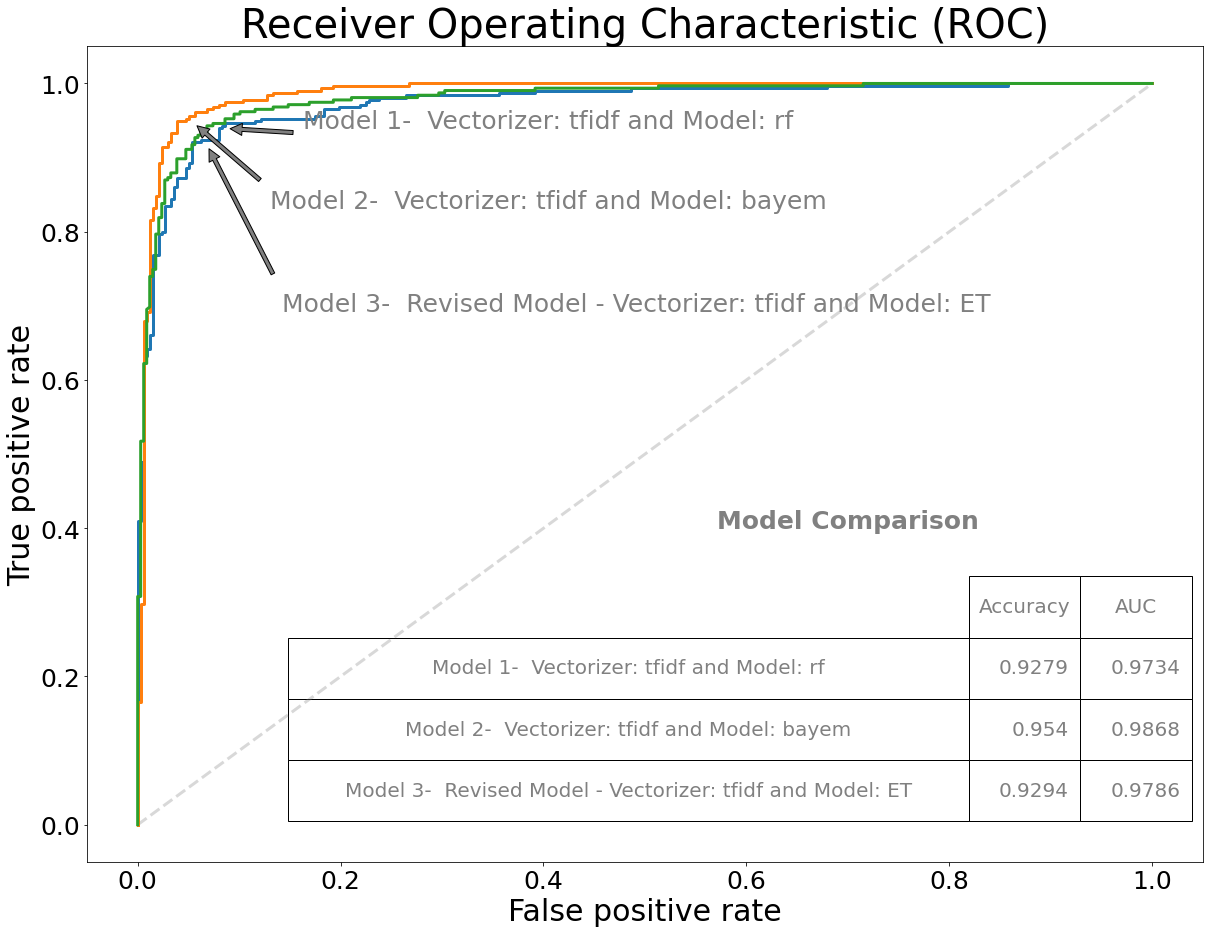

In [39]:
# comparing the various ROC for the best 3 combination model
roc_compare(best_df, mlocs=[0,1,3])

After some hyperparameter tuning to reduce overfitting on the ExtraTreesClassifier, the test accuracy score of the ExtraTreesClassifier model actually drop to 0.929 and actually perform worse than the MultinomialNB which have a test accuracy score of 0.954. Based on the accuracy scores in the sorted dataframe and ROC curves, the best performing model is MultinomialNB. Other performance metrics such as sensitivity and specificity scores for the MultinomialNB model also outperformed the revised ExtraTreesClassifier and RandomForestClassifier models. Hence, I will be using TfidfVectorizer with MultinomialNB as the final model to predict the data which require classification. This will be carried out in the final step.

### Final Model and Classifications of the Unseen Data (Data to be classified in the problem statment)

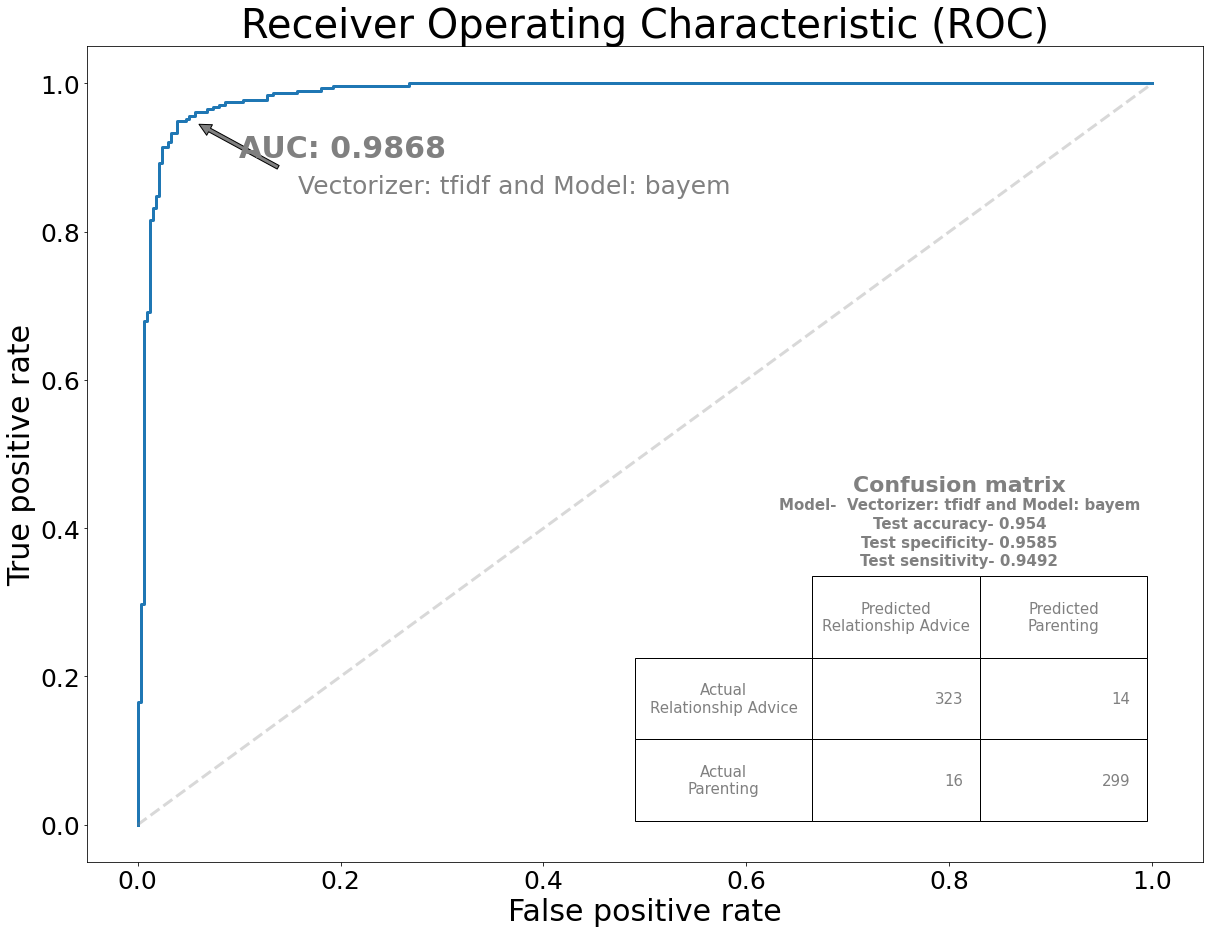

In [40]:
# Plotting the ROC for the best combination - TfidfVectorizer with MultinomialNB model with statistics and confusion matrix
roc_compare(best_df, mlocs=[1])

In [41]:
# getting the best_param of the TfidfVectorizer + MultinomialNB model
best_df['best_param'][1]

{'vec__max_df': 1.0,
 'vec__max_features': 2250,
 'vec__min_df': 0.0,
 'vec__ngram_range': (1, 2),
 'vec__stop_words': 'english'}

In [42]:
# Train test split the training data
X_train, X_test, y_train, y_test = train_test_split(training_data['final'], training_data['subreddit'], 
                                                    stratify = training_data['subreddit'], random_state = 42) 

# Instantiate our TfidfVectorizer with the parameters from the best model
tvec = TfidfVectorizer(max_features=2250, min_df=0.0, max_df=1.0, ngram_range=(1,2), stop_words='english')

# Fit our TfidfVectorizer on the entire training_data and transform the training_data.
X_train_tvec = pd.DataFrame(tvec.fit_transform(X_train).todense(),
                          columns = tvec.get_feature_names())

In [43]:
# Instantiate our nb model!
nb = MultinomialNB()

# Fit our nb model!
nb.fit(X_train_tvec, y_train)

MultinomialNB()

In [44]:
# sort the top 10 features which predict each subreddit - Relationship Advice or Parenting
ra_prob_sorted = nb.feature_log_prob_[0, :].argsort()[::-1]
pa_prob_sorted = nb.feature_log_prob_[1, :].argsort()[::-1]

# print the top 10 features for each subreddit
print("Top 10 Features for Relationship Advice: ", np.take(tvec.get_feature_names(), ra_prob_sorted[:10]))
print("Top 10 Features for Parenting: ", np.take(tvec.get_feature_names(), pa_prob_sorted[:10]))

Top 10 Features for Relationship Advice:  ['like' 'just' 'don' 'relationship' 'know' 'want' 'feel' 'really' 've'
 'friends']
Top 10 Features for Parenting:  ['kids' 'old' 'just' 'son' 'time' 'daughter' 'like' 'year' 'school'
 'year old']


In [45]:
# To simulate the scenario of unseen data i will drop the column subreddit
testing_data.drop(columns=['subreddit'], inplace=True)
testing_data

,final
1254,Gentle sleep training method for 10 month old?...
2704,My partner said he would ‘beg’ for me to have ...
2451,Confidence roller coaster So I'm a first year ...
2369,Why is getting over him so hard? Even though h...
2098,My (29F) husband (33M) is deleting messages fr...
...,...
1267,School principal told classroom with Covid-pos...
1503,Young dad and my son doesn't seem to be on tra...
95,12 wk old teething? Has anyone else experience...
2270,You will be ok. Humans are part of the world a...


In [46]:
# Instantiate our TfidfVectorizer with the parameters from the best model
tvec = TfidfVectorizer(max_features=2250, min_df=0.0, max_df=1.0, ngram_range=(1,2), stop_words='english')

# Fit our TfidfVectorizer on the entire training_data and transform the training_data.
X_train_tvec = pd.DataFrame(tvec.fit_transform(training_data['final']).todense(),
                          columns = tvec.get_feature_names())

# Transform our testing_data with the already-fit TfidfVectorizer
X_test_tvec = pd.DataFrame(tvec.transform(testing_data['final']).todense(),
                         columns = tvec.get_feature_names())

In [47]:
# Instantiate our final model!
nb = MultinomialNB()

# Fit our final model!
final_model = nb.fit(X_train_tvec, training_data['subreddit'])

In [48]:
# Generate our predictions!
predictions = final_model.predict(X_test_tvec)

In [49]:
# Storing our predictions into the testing_data dataframe
testing_data['classifications'] = predictions

In [50]:
# saving the dataframe to csv so that operation team can view the results.
testing_data.to_csv('Submission.csv')

In [51]:
# save the final model
dump(nb, 'final_subreddit_classification.joblib') 

['final_subreddit_classification.joblib']

### Conclusion and Recommendation

#### Conclusion
In conclusion, after running through different algorithms/models with either TfidfVectorizer or CountVectorizer, my final model used to help tackle the problem of missing subreddit labels (Parenting or Relationship Advice) encountered by the operation team is TfidfVectorizer with MultinomialNB combination model. The primary performance metric that I used to evaluate the various combination models is accuracy score. However, I also consider other performance metrics such as sensitivity, specificity scores, ROC curve and AUC and generally my final model also perform well in all these metrics. 

Based on the accuracy score of the test data after train_test_split, my final model achieved test accuracy score of about 0.954 which is high. The sensitivity and specificity scores are also in the region of 0.94 to 0.95.


#### Recommendation
Given more time, I will look into using stemming and lemmitizing before using CountVectorizer or TfidfVectorizer to see if I can improve my model results. Also, i will look to fine tune the stop words or removing some words which doesnt really make sense such as 'didn', 've' which actually refer to 'didn't' and 'have' respectively.  Also, I can look into tuning the parameters of the vectorizers to get the better features. 

Also, I can look to improve the regex code to remove words which include the subreddits terms - Parenting, Relationship Advice with the possibility of typo errors. Example, i will remove 'ParentingA@' as a whole term.

With this, I expect the model to perform better in classifying the posts, descriptions into the 2 subreddits.
